# STIRAP State Transfer in the Bright State

If sufficiently off-resonance such that the natural linewidth of the less lossy of the two bright states, $\gamma_B$ is small enough such that $\gamma_B T\ll 1$ during the STIRAP overlap region of time duration $T$, and the adiabaticity condition holds for the bright state (which now requires that $\dot{\Omega}/(\Delta^2+\Omega^2)\ll 1$ in addition to $\kappa_\mp\dot{\theta}/(\Delta\pm\sqrt{\Omega^2+\Delta^2}) \ll 1$ which applies for dark state STIRAP, where $\dot{\theta}$ is similar to what we usually call the inverse of the overlap time $\dot{\theta}\sim\pi/2T$, and where $\kappa_\pm = \sqrt{1\pm\Delta/\sqrt{\Delta^2+\Omega^2}}/\sqrt{2}$), then adiabatic transfer can also be performed in the bright state. When far off resonance, the decay rate of the less lossy of the two bright states is $\gamma_B\approx \gamma \Omega^2/(4\Delta^2)$ at lowest order in $(\Omega/\Delta)$.

In [22]:
%matplotlib inline
import sys
sys.path.append('./code')
sys.path.append('../Statistics/code')

from simulations import IntegrateSchrodingerEquation
from statfunctions import PolynomialFit1D
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
import numpy as np

Here are some simulation parameters. Here we use gaussian lineshapes for the laser couplings. Here I am using a fly-through time and a rabi frequency that is similar to that used in our system. I am assuming a large 1-photon detuning (10 MHz) like that used in our system, and i am assuming two photon resonance. I am deviating from our system by cutting the excited state decay rate by a factor of 5 compared to our system to mitigate the effect of decay so that the bright state transfer will have higher efficiency.

In [ ]:
gaussian = lambda t, t0, dt: np.exp(-(t - t0)**2/(2 * dt**2))

T = 5*10**(-6)
N = 750

t = np.linspace(-T, T, N)

width = T/6.0
Omega = 6 * 2 * np.pi * 10**6
omega0 = lambda sep: gaussian(t, +sep, width) * Omega
omega1 = lambda sep: gaussian(t, -sep, width) * Omega

Gamma = (1 / (500 * 10**(-9)))/5
Delta = 10 * 2 * np.pi * 10**6
delta = 0

energy = {'X': -delta, 
          'C': Delta - 1j*Gamma/2,
          'H': delta}

omega = lambda sep: {('X','C'): omega0(sep),
                     ('C','H'): omega1(sep)}

Here is a simulation showing the time evolution in the target state as a function of time vs. beam separation. 

- $s = +\delta s$ - normal STIRAP transfer in the dark state - the population rises steadily and monotonically and approaches unity efficiency.
- $s \approx 0$ - perfect overlap of the laser beams - two photon rabi flopping between the initial and target state - the transfer efficiency depends critically on the overlap time and Rabi frequency.
- $s = - \delta s$ - reverse STIRAP transfer in the bright state - the population rises steadily and monotonically, and approaches a fairly high, but non-unity transfer efficiency due entirely to decay (adiabaticity is sufficient to allow for unity transfer without decay)

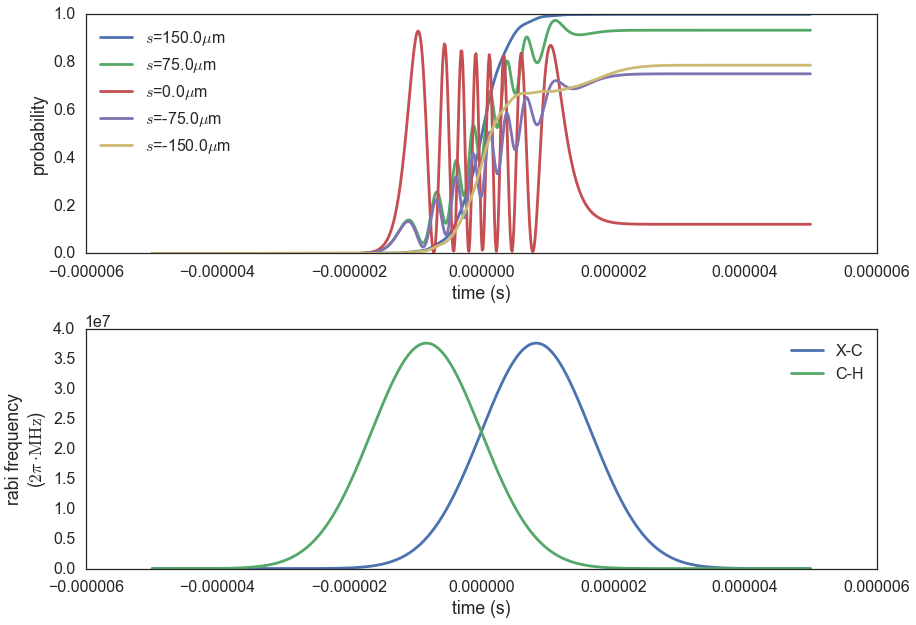

In [59]:
sep = np.array([width, width/2, 0, -width/2.0, -width])

ISE = IntegrateSchrodingerEquation.parameter_sweep(sep,
                                                   t=t,
                                                   energy=energy,
                                                   omega =omega,
                                                   psi0 = {'X':1, 'C':0, 'H':0},
                                                   final_state=False,
                                                   parallelize=False)

plt.subplot(2,1,1)
for ise, s in zip(ISE, sep):
    ise.plot(states={('$s$='+str(s * 180/(10**(-6))) + '$\mu$m'):[0,0,1]}, plot_norm=False)
plt.subplot(2,1,2)
ISE[0].plot_omega()
plt.tight_layout()

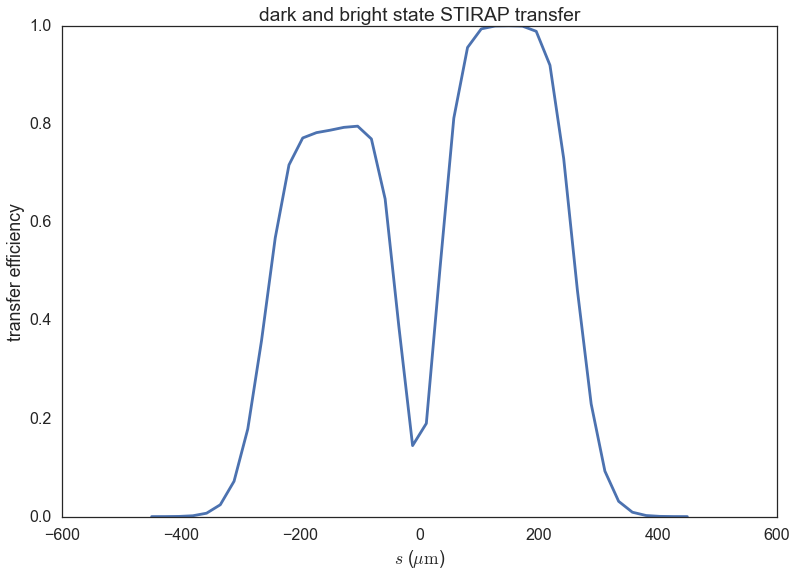

In [60]:
sep = width * np.linspace(-3, 3, 40)

ISE = IntegrateSchrodingerEquation.parameter_sweep(sep,
                                                   t=t,
                                                   energy=energy,
                                                   omega =omega,
                                                   psi0 = {'X':1, 'C':0, 'H':0},
                                                   final_state=True,
                                                   parallelize=False)

final_state = np.array([0,0,1])
ISE = np.array(ISE)
P = np.abs(np.dot(ISE,final_state))**2

plt.plot(sep*180/(10**(-6)), P)
plt.xlabel('$s$ ($\mu\\mathrm{m}$)')
plt.ylabel('transfer efficiency')
_ = plt.title('dark and bright state STIRAP transfer')